## Here, I am testing the data I scraped from the web with the best (final) model for the data set downloaded from Kaggle

In [3]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
sns.set_style()
%matplotlib inline

In [4]:
# Making data set from images that are in folders named as their class_label

column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men',
                 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'saree', 'sherwanis', 'women_kurta']

test_dataset = image_dataset_from_directory(
    '/Users/butler/Documents/springboard_bootcamp/Classification_Traditional_Indian_Clothing/data/processed/new_test_images/',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=False,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7498 files belonging to 15 classes.


In [5]:
# Normalizing images
normalization_layer = layers.Rescaling(1./255)
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [6]:
# Setting up model
img_width, img_height = 70, 70
epochs = 2000
batch_size = 128
n_classes = 15
input_shape= (img_width, img_height, 1)

In [7]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Loading the best weights for this model
model.load_weights('/Users/butler/Documents/springboard_bootcamp/Classification_Traditional_Indian_Clothing/models/Final_model/final_model.keras')

In [31]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 4s - loss: 2.8508 - accuracy: 0.5609 - 4s/epoch - 62ms/step


## The original test data gave 84.68%. A retrained model is needed to make better predictions for this data.

In [10]:
# Un-doing the normalization in order to visualize the images
test_dataset = test_ds_norm.map(lambda x, y: (255*x, y))

In [11]:
# Getting the images (x_test) and true categories (y_true) from data set
y_true = []
x_test = []
for x, y in test_dataset:
    y = y.numpy()
    y_true.append(y)
    x_test.append(x)

2023-10-02 12:36:35.594731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7498]
	 [[{{node Placeholder/_4}}]]
2023-10-02 12:36:35.594976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7498]
	 [[{{node Placeholder/_4}}]]


In [12]:
# Unpacking nested list into 1-D list
y_true = [item for sublist in y_true for item in sublist]

In [13]:
# Unpacking nested list into 1-D list
x_test = [item for sublist in x_test for item in sublist]

In [14]:
# Getting y_pred from model
y_pred = model.predict(
    test_ds_norm,
    batch_size=None,
    verbose="auto",
    )

59/59 [==============================] - 4s 59ms/step


In [15]:
# Since softmax gives a probability distribution, the predicted value is the category with the biggest 
# probability distribution
y_pred = y_pred.argmax(axis=1)

In [16]:
# Squeezing the np array so that its shape is (70, 70) instead of (70, 70, 1), which is required for grayscale 
# Image.fromarray)

def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = np.squeeze(tensor, axis=2)
    return Image.fromarray(tensor)

In [17]:
# Making a dictionary to take the numerical output and translate it to the class label.
labels = {0:'blouse', 1:'dhoti_pants', 2:'dupattas', 3:'gowns', 4:'kurta_men', 5:'leggings_and_salwars', 6:'lehenga',
          7:'mojaris_men', 8:'mojaris_women', 9:'nehru_jackets', 10:'palazzos', 11:'petticoats', 12:'sherwanis', 13: 'saree',
           14:'women_kurta'}

True label: blouse
Predicted label: women_kurta


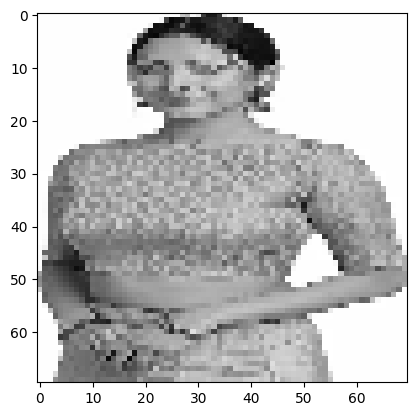

In [18]:
# Showing some images and their true and predicted labels
img = tensor_to_image(x_test[0])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[0]]}')
print(f'Predicted label: {labels[y_pred[0]]}')

True label: dhoti_pants
Predicted label: sherwanis


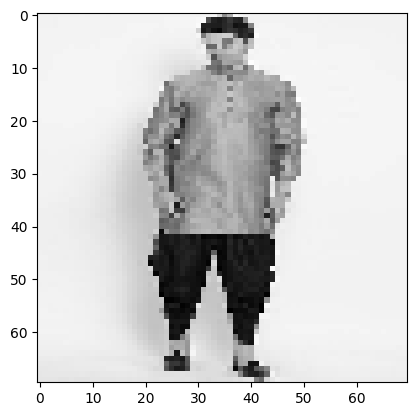

In [19]:
img = tensor_to_image(x_test[550])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[550]]}')
print(f'Predicted label: {labels[y_pred[550]]}')

## The image above shows a man wearing both dhoti pants and a sherwani

True label: kurta_men
Predicted label: kurta_men


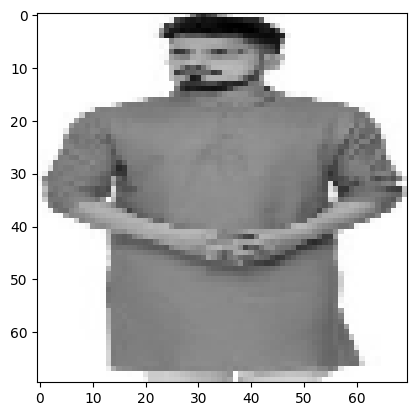

In [20]:
img = tensor_to_image(x_test[2000])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[2000]]}')
print(f'Predicted label: {labels[y_pred[2000]]}')

True label: lehenga
Predicted label: lehenga


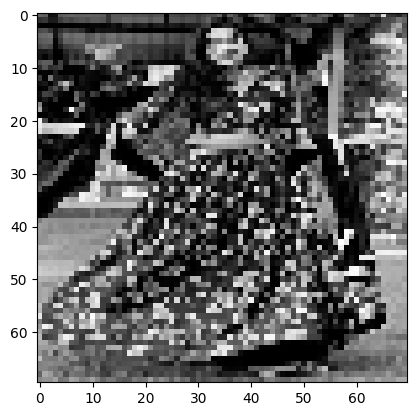

In [21]:
img = tensor_to_image(x_test[3000])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[3000]]}')
print(f'Predicted label: {labels[y_pred[3000]]}')

True label: mojaris_women
Predicted label: mojaris_women


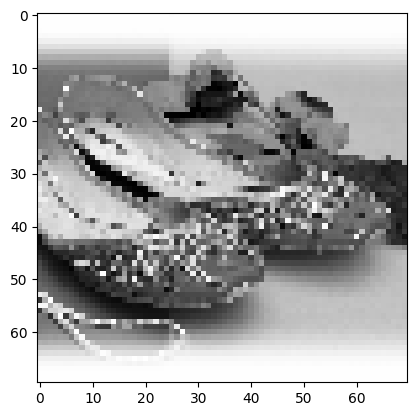

In [22]:
img = tensor_to_image(x_test[4000])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[4000]]}')
print(f'Predicted label: {labels[y_pred[4000]]}')

True label: sherwanis
Predicted label: dupattas


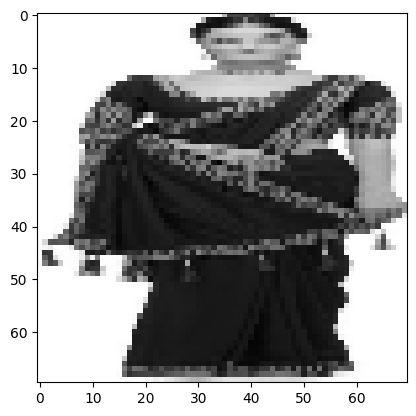

In [23]:
img = tensor_to_image(x_test[6400])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[6400]]}')
print(f'Predicted label: {labels[y_pred[6400]]}')

## In the above picture, the pallu (the end piece of a saree that goes over the shoulder) is shaped somewhat like a dupatta.

True label: saree
Predicted label: kurta_men


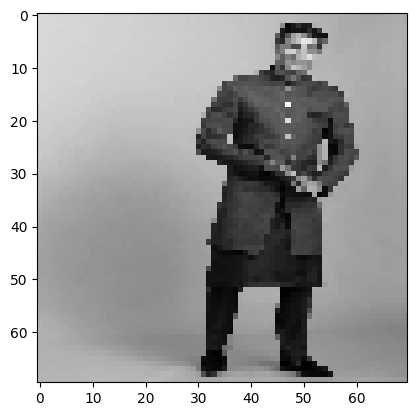

In [24]:
img = tensor_to_image(x_test[6600])
plt.imshow(img, cmap='gray')
print(f'True label: {labels[y_true[6600]]}')
print(f'Predicted label: {labels[y_pred[6600]]}')

In [25]:
# Making list of true labels from the true numerical labels using the dictionary labels
true_labels = []
for i in range(7297):
  label = y_true[i]
  true_label = labels[label]
  true_labels.append(true_label)

In [26]:
# Making list of predicted labels from the predicted numerical labels using the dictionary labels
pred_labels = []
for i in range(7297):
  pred_label = labels[y_pred[i]]
  pred_labels.append(pred_label)

In [27]:
cm = confusion_matrix(true_labels, pred_labels)
cm

array([[404,   2,  19,   3,   1,   7,   9,   4,   7,   5,  11,   2,  14,
         10,   2],
       [  1, 174,  15,   1,  37, 182,   8,   0,   0,   7,  22,   1,   2,
         46,   4],
       [  2,   2, 138,  13,   4,   4, 197,   3,   3,   4,  23,   1,  21,
         21,  63],
       [  1,   0,  10, 154,   0,   0, 219,   3,   0,   1,  22,   1,   5,
         11,  73],
       [  0,   0,   6,   1, 378,   1,   6,   0,   1,  47,   6,   0,   1,
         47,   6],
       [  1,  49,  18,  13,   0, 350,  11,   2,   1,   0,  16,   1,  15,
          8,  14],
       [  0,   1,   4,  21,   0,   0, 445,   0,   0,   0,  17,   0,   6,
          3,   3],
       [  1,  10,   5,   1,   0,   9,  11, 354,  88,   0,   6,   1,   9,
          5,   0],
       [  8,   5,   8,   0,   0,   3,   7,  65, 388,   0,   4,   0,   6,
          4,   2],
       [  1,   0,   1,   0,  22,   0,   4,   0,   0, 444,   0,   1,   2,
         24,   1],
       [  0,   2,   7,   2,   2, 137,  13,   2,   0,   0, 303,  11,   4,
       

<Axes: >

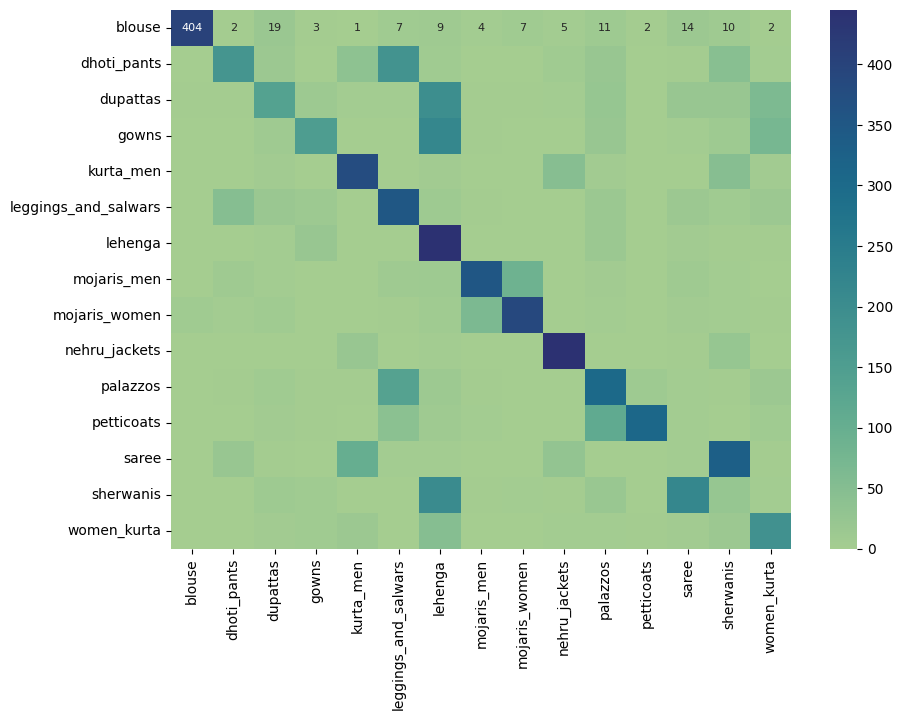

In [29]:
df_cm = pd.DataFrame(cm, index = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'saree', 'sherwanis', 'women_kurta'],
                  columns = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats',  'saree', 'sherwanis','women_kurta'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, annot_kws={"size":8}, fmt='d', cmap='crest')

## This model has most trouble distinguishing between:
## - lehengas and sarees, 
## - dupattas, gowns, and lehengas,
## - men's kurtas and sherwanis,
## - dhoti pants and leggings_and_salwars
## - and palazzos and leggings_and_salwars
## for this data.
